# Analisi Funzionale degli ERP

In [1]:
import numpy as np
import os
import pandas as pd
import skfda
import matplotlib.pyplot as plt
from skfda.exploratory.visualization import Boxplot
from skfda.inference.anova import oneway_anova
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from scipy import integrate, stats
from scipy.stats import wilcoxon, f_oneway, normaltest, kruskal

In [2]:
home_path = os.path.abspath(os.getcwd())

#definizione della basis e lambda
basis = skfda.representation.basis.BSpline(n_basis=18)
smoother=skfda.preprocessing.smoothing.BasisSmoother(basis, smoothing_parameter=1e-5)

# Animali

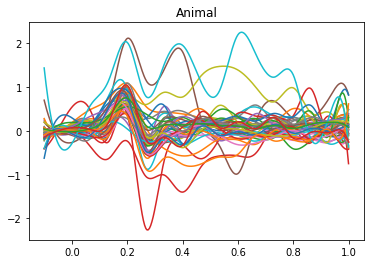

In [3]:
df=pd.read_csv(home_path + '\\final_signals\\animal_avg_occipital.csv')
data_animals=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_animals.T, grid_points=times)
animal_basis = smoother.fit_transform(datagrid)
fig=animal_basis.plot()
plt.title('Animal')
plt.show()

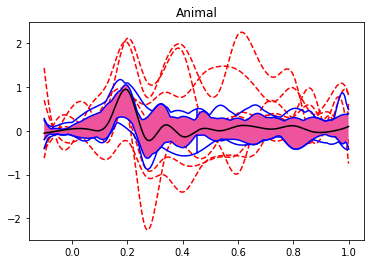

In [4]:
fdBoxplot = Boxplot(animal_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Animal')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
animal=animal_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

for idx in outliers:
    data_animals = data_animals.drop('sub ' + str(idx), axis = 1)

# Body Parts

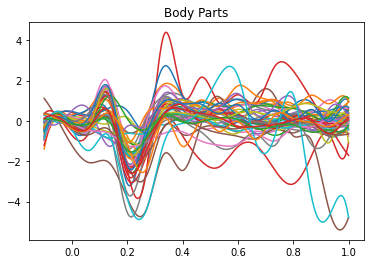

In [5]:
df=pd.read_csv(home_path + '\\final_signals\\body_avg_occipital.csv')
data_body=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_body.T, grid_points=times)
body_basis = smoother.fit_transform(datagrid)
fig=body_basis.plot()
plt.title('Body Parts')
plt.show()

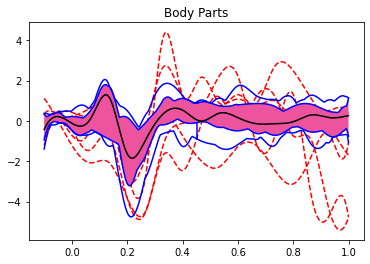

In [6]:
fdBoxplot = Boxplot(body_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Body Parts')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
body=body_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

for idx in outliers:
    data_body = data_body.drop('sub ' + str(idx), axis = 1)

# Vehicles

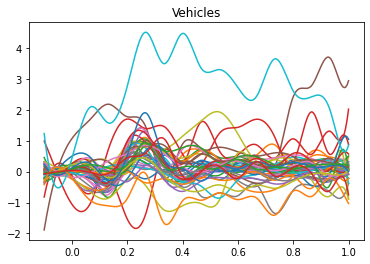

In [7]:
df=pd.read_csv(home_path + '\\final_signals\\vehicle_avg_occipital.csv')
data_vehicle=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_vehicle.T, grid_points=times)
vehicle_basis = smoother.fit_transform(datagrid)
fig=vehicle_basis.plot()
plt.title('Vehicles')
plt.show()

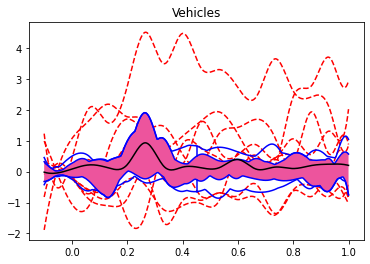

In [8]:
fdBoxplot = Boxplot(vehicle_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Vehicles')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
vehicle=vehicle_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

for idx in outliers:
    data_vehicle = data_vehicle.drop('sub ' + str(idx), axis = 1)

# Tools

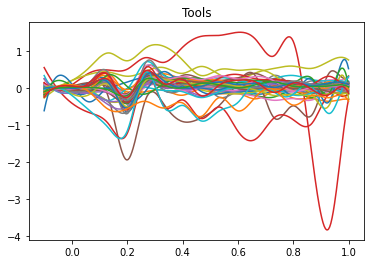

In [9]:
df=pd.read_csv(home_path + '\\final_signals\\tool_avg_occipital.csv')
data_tools=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_tools.T, grid_points=times)
tool_basis = smoother.fit_transform(datagrid)
fig=tool_basis.plot()
plt.title('Tools')
plt.show()

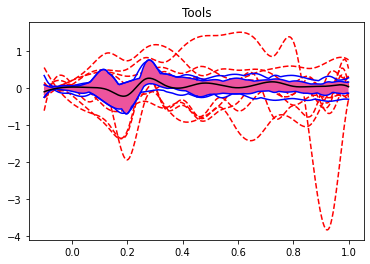

In [10]:
fdBoxplot = Boxplot(tool_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Tools')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
tool=tool_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

for idx in outliers:
    data_tools = data_tools.drop('sub ' + str(idx), axis = 1)

# Food

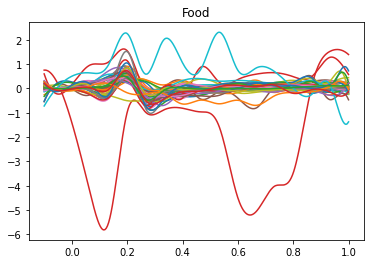

In [11]:
df=pd.read_csv(home_path + '\\final_signals\\food_avg_occipital.csv')
data_food=df.iloc[:,3:]
times=df['time']
datagrid=skfda.FDataGrid(data_matrix=data_food.T, grid_points=times)
food_basis = smoother.fit_transform(datagrid)
fig=food_basis.plot()
plt.title('Food')
plt.show()

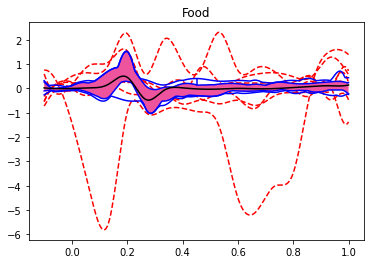

In [12]:
fdBoxplot = Boxplot(food_basis.to_grid())
fdBoxplot.show_full_outliers = True
fig=fdBoxplot.plot()
plt.title('Food')
plt.show()

non_outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if not b]
food=food_basis[non_outliers]
outliers = [i for (i, b) in zip(np.arange(len(fdBoxplot.outliers)), fdBoxplot.outliers) if b]

for idx in outliers:
    data_food = data_food.drop('sub ' + str(idx), axis = 1)

# Functional ANOVA

In [13]:
v_n, p = oneway_anova(animal, body, vehicle, tool, food)

In [14]:
p

0.0

# Functional Principal Component Analysis

In [15]:
erp=animal.concatenate(body, vehicle, tool, food)
components_number = 6

In [16]:
fpca = FPCA(n_components=components_number)
fpca.fit(erp)
erp_scores=fpca.transform(erp)

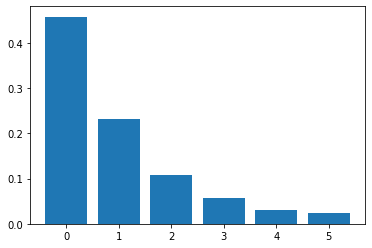

In [17]:
#Calcolo degli explained variance ratios
ex_var=fpca.explained_variance_ratio_

plt.bar(np.arange(components_number), ex_var)
plt.show()

In [18]:
#Calcolo della cumulatiuve explained variance per le prime 5 componenti (per arrivare al 90% di varianza spiegata)
print(np.sum(ex_var[:6]))
print(np.sum(ex_var[:5]))
print(np.sum(ex_var[:4]))
print(np.sum(ex_var[:3]))
print(np.sum(ex_var[:2]))
print(np.sum(ex_var[:1]))

0.9111302519475081
0.8863788042984874
0.8553047697921454
0.7979193849026796
0.6903891187867328
0.4583488291864482


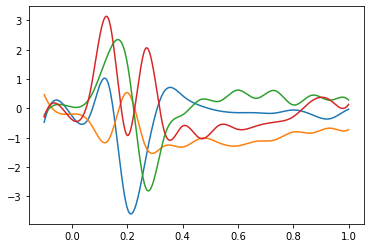

In [19]:
components_number=4
erp2 = animal.concatenate(body, vehicle, tool, food)
fpca = FPCA(n_components=components_number)
fpca.fit(erp2)
fpca.components_.plot()
plt.show()

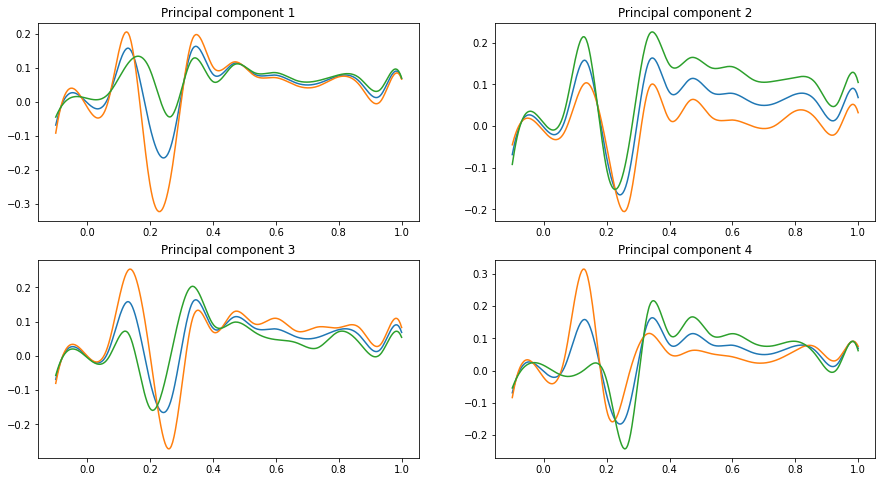

In [20]:
FPCAPlot(
    fpca.mean_,
    fpca.components_,
    multiple=0.05,
    fig=plt.figure(figsize=(15, 8)),
    n_rows=2,
).plot()
plt.show()

In [21]:
n_clusters=5
fda_clusters=np.append(np.zeros_like(animal),np.append(np.ones_like(body),np.append(2*np.ones_like(vehicle),np.append(3*np.ones_like(tool),4*np.ones_like(food)))))

fda_color_map = {
    0: "purple",
    1: "blue",
    2: "green",
    3: "red",
    4: "orange",
}

# Names of each category
categories = {
    0: "Animal",
    1: "Body Parts",
    2: "Vehicle",
    3: "Tool",
    4: "Food",
}

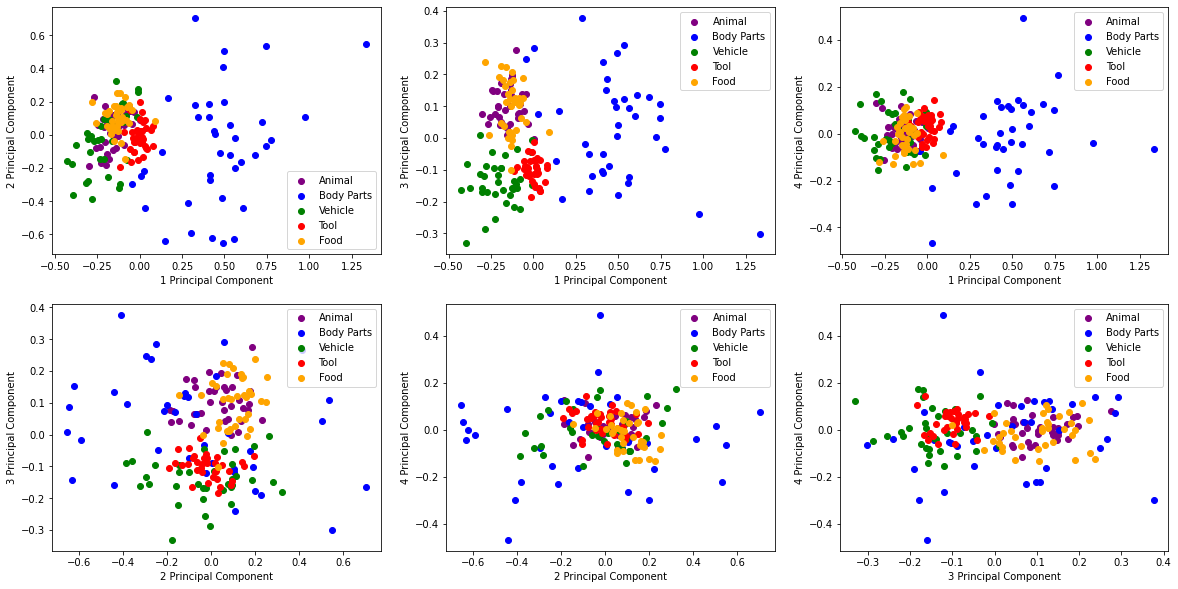

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
idx = 0
k = idx + 1
for ax in axes.flat:
    for cluster in range(n_clusters):
        selection = fda_clusters == cluster
        ax.scatter(
            erp_scores[selection, idx],
            erp_scores[selection, k],
            color=fda_color_map[cluster],
            label=categories[cluster],
        )

    ax.set_xlabel(str(idx+1) +' Principal Component')
    ax.set_ylabel(str(k+1) +' Principal Component')
    ax.legend()
    
    k=k+1
    
    if k == components_number :
        idx = idx + 1
        k = idx +1
plt.show()

## Analysis of fPC scores

In [23]:
selection = fda_clusters == 0
scores_animal = erp_scores[selection]

selection = fda_clusters == 1
scores_body = erp_scores[selection]

selection = fda_clusters == 2
scores_vehicle = erp_scores[selection]

selection = fda_clusters == 3
scores_tool = erp_scores[selection]

selection = fda_clusters == 4
scores_food = erp_scores[selection]

In [24]:
for pc in range(4):
    print('// ' + str(pc+1) + ' Principal Component //')
    
    res = normaltest(scores_animal[:,pc])
    print ('Animal : ' + str(res.pvalue))
    
    res = normaltest(scores_body[:,pc])
    print ('Body Parts : ' + str(res.pvalue))
    
    res = normaltest(scores_vehicle[:,pc])
    print ('Vehicles : ' + str(res.pvalue))
    
    res = normaltest(scores_tool[:,pc])
    print ('Tools : ' + str(res.pvalue))
    
    res = normaltest(scores_food[:,pc])
    print ('Food : ' + str(res.pvalue))
    
    print('\n')

// 1 Principal Component //
Animal : 0.9076922045957889
Body Parts : 0.02696761253448873
Vehicles : 0.5436125843558948
Tools : 0.40357706712596686
Food : 0.0027172412734297632


// 2 Principal Component //
Animal : 0.34230430749712054
Body Parts : 0.7752171308319344
Vehicles : 0.5527320711618827
Tools : 0.7508552532999627
Food : 0.152904025136764


// 3 Principal Component //
Animal : 0.27656756972045626
Body Parts : 0.6038484260293229
Vehicles : 0.4524809750297992
Tools : 0.834393900211605
Food : 0.5956273466524351


// 4 Principal Component //
Animal : 0.8629954402457726
Body Parts : 0.2239072739754962
Vehicles : 0.47097933616701193
Tools : 0.8355244791888778
Food : 0.305690053454071




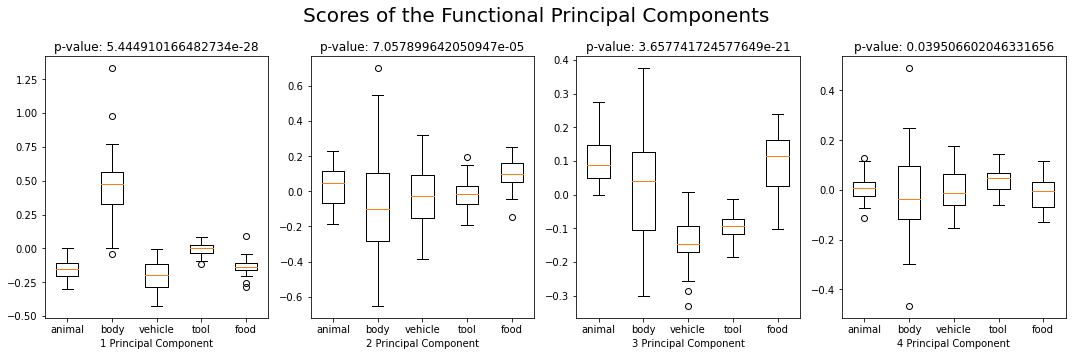

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Scores of the Functional Principal Components', fontsize = 20)
pc = 0
for ax in axes.flat:
    scores = [scores_animal[:,pc], scores_body[:,pc], scores_vehicle[:,pc], scores_tool[:,pc], scores_food[:,pc]]
    cat = ['animal', 'body', 'vehicle', 'tool', 'food']
    stat, p_val = kruskal(scores_animal[:,pc], scores_body[:,pc], scores_vehicle[:,pc], scores_tool[:,pc], scores_food[:,pc])
    ax.boxplot(scores, labels = cat)
    ax.set_title('p-value: ' + str(p_val))
    ax.set_xlabel(str(pc+1) +' Principal Component')
    pc += 1
plt.tight_layout()
plt.show()

# Extraction of Discrete Measures through the Jacknife Approach

In [26]:
def grand_averages(data, times): #ok funziona
    #Calcolo delle grand averages attraverso il metodo jacknife
    
    result_list = []
    for col in data.columns:
        
        #non considero il segnale dell'i-esimo soggetto
        #jk=data.drop(col, axis = 1)
        
        #calcolo la grand average
        #avg=jk.mean(axis=1)
        #result_list.append(avg.tolist())
        result_list.append(data[col].tolist())
        
    #Creo un dataframe con le grand averages ottenute attraverso l'approccio jacknife
    result = pd.DataFrame(result_list).T
    result.columns=data.columns
    result['time']=times
    
    return result

def area_pos(data, window): #ok funziona con un warning
    #calcolo dell'area positiva dell'intervallo considerato
    
    area=[]
    
    #considero i valori dei segnali relativi alla finestra di tempo desiderata
    signal_portion = data[(data['time'] >= window[0]) & (data['time'] <= window[1])]
    
    for col in signal_portion.columns[:-1]:
        
        #imposto a zero tutti i valori negativi per calcolare solo le parti di area positive
        signal_portion.loc[signal_portion[col] < 0 , col] = 0
        
        #calcolo l'area positiva attraverso la formula di Cavalieri-Simpson
        area.append(integrate.simpson(signal_portion[col], signal_portion['time']))
   
    return area

def area_neg(data, window): #ok funziona con un warning
    #calcolo dell'area positiva dell'intervallo considerato
    
    area=[]
    
    #considero i valori dei segnali relativi alla finestra di tempo desiderata
    signal_portion = data[(data['time'] >= window[0]) & (data['time'] <= window[1])]
    
    for col in signal_portion.columns[:-1]:
        
        #imposto a zero tutti i valori positivi per calcolare solo le parti di area negative
        signal_portion.loc[signal_portion[col] > 0 , col] = 0

        #calcolo l'area negativa attraverso la formula di Cavalieri-Simpson
        area.append(integrate.simpson(signal_portion[col], signal_portion['time']))
        
    return area

def area(data, window, sign):
    if sign == 'pos':
        
        return area_pos(data, window)
    
    else: return area_neg(data, window)

def latency(data, window, percentage, sign): 
    
    #stimo la latency tramite il punto in cui l'area della componente raggiunge una certa precentuale rispetto all'area totale
    
    latency = []
    area_tot = area(data, window, sign)
    
    #considero i valori dei segnali relativi alla finestra di tempo desiderata
    signal_portion = data[(data['time'] >= window[0]) & (data['time'] <= window[1])]
    
    for col in signal_portion.columns[:-1]:
        
        area_temp = 0
        idx = 1
        
        if area_tot[signal_portion.columns.tolist().index(col)] == 0:
            latency.append(0)
        
        else:        
            while ((area_temp / area_tot[signal_portion.columns.tolist().index(col)] * 100 < percentage) and idx < len(signal_portion[col])):
            
                signal_temp = signal_portion.iloc[:idx]
                
                #print(col + str(idx))
                
                area_temp = area(signal_temp[[col, 'time']], [window[0], signal_portion.iloc[idx]['time']], sign)
                idx += 1
        
            latency.append(signal_portion.iloc[idx-1]['time'])
    
    return latency

In [27]:
def Picco(data, window, sign):
    
    #considero i valori dei segnali relativi alla finestra di tempo desiderata
    signal_portion = data[(data['time'] >= window[0]) & (data['time'] <= window[1])]
    signal_portion = signal_portion.drop('time', axis=1)
    if sign == 'pos':
        massimo = signal_portion.max()
        picco = massimo.tolist()
        
    else : 
        minimo = signal_portion.min()
        picco = minimo.tolist()
        
    return picco

In [28]:
def Picco_perc(data, window, percentage, sign):
    
    latency = []
    picco_tot = Picco(data, window, sign)
    
    #considero i valori dei segnali relativi alla finestra di tempo desiderata
    signal_portion = data[(data['time'] >= window[0]) & (data['time'] <= window[1])]
    
    for col in signal_portion.columns[:-1]:
        
        picco_temp = 0
        idx = 1
               
        while ((picco_temp / picco_tot[signal_portion.columns.tolist().index(col)] * 100 < percentage) and idx < len(signal_portion[col])):

            signal_temp = signal_portion.iloc[:idx]

            picco_temp = Picco(signal_temp[[col, 'time']], [window[0], signal_portion.iloc[idx]['time']], sign)
            picco_temp = picco_temp[0]
            idx += 1
            
        latency.append(signal_portion.iloc[idx-1]['time'])
    
    return latency

# Linear Correlation between FPCs and Discrete Measures

In [29]:
data_animals.columns = data_animals.columns + ' animal'
data_body.columns = data_body.columns + ' body'
data_vehicle.columns = data_vehicle.columns + ' vehicles'
data_tools.columns = data_tools.columns + ' tools'
data_food.columns = data_food.columns + ' food'

In [30]:
df_totale = pd.concat([data_animals, data_body, data_vehicle, data_tools, data_food], axis = 1)

In [31]:
avg_totale = grand_averages(df_totale, times)
#avg_totale = df_totale
#avg_totale['time']=times

In [32]:
area_p1 = area(avg_totale, [0.05, 0.15], 'pos') #0.05,0.15
latency_p1 = latency(avg_totale, [0.05, 0.15], 50, 'pos')
perc_p1 = Picco_perc(avg_totale, [0.05, 0.15], 50, 'pos')

 C:\Users\Asus\AppData\Local\Temp\ipykernel_9088\2590855441.py:33: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
area_n1 = area(avg_totale, [0.1, 0.2], 'neg') #0.1,0.25
latency_n1 = latency(avg_totale, [0.1, 0.2], 50, 'neg')
perc_n1 = Picco_perc(avg_totale, [0.1, 0.2], 50, 'neg')

 C:\Users\Asus\AppData\Local\Temp\ipykernel_9088\2590855441.py:51: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
area_n2 = area(avg_totale, [0.2, 0.3], 'neg') #0.2 0.45
latency_n2 = latency(avg_totale, [0.2, 0.3], 50, 'neg')
perc_n2 = Picco_perc(avg_totale, [0.2, 0.3], 50, 'neg')

 C:\Users\Asus\AppData\Local\Temp\ipykernel_9088\2590855441.py:51: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
area_p3 = area(avg_totale, [0.25, 0.85], 'pos') #0.25 0.85
latency_p3 = latency(avg_totale, [0.25, 0.85], 50, 'pos')
perc_p3 = Picco_perc(avg_totale, [0.25, 0.85], 50, 'pos')

 C:\Users\Asus\AppData\Local\Temp\ipykernel_9088\2590855441.py:33: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
#disc_val = pd.DataFrame([area_p1, latency_p1, perc_p1, area_n1, latency_n1, perc_n1, area_n2, latency_n2, perc_n2, area_p3, latency_p3, perc_p3]).T
#disc_val.columns = ['area P1', 'latency P1', 'perc_p1', 'area N1', 'latency N1', 'perc_n1', 'area N2', 'latency N2', 'perc_n2', 'area P3', 'latency P3', 'perc_p3']

In [37]:
#df_coef = pd.DataFrame(columns = ['area P1', 'latency P1', 'perc_p1', 'area N1', 'latency N1', 'perc_n1', 'area N2', 'latency N2', 'perc_n2', 'area P3', 'latency P3', 'perc_p3'])
#df_pval = pd.DataFrame(columns = ['area P1', 'latency P1', 'perc_p1', 'area N1', 'latency N1', 'perc_n1', 'area N2', 'latency N2', 'perc_n2', 'area P3', 'latency P3', 'perc_p3'])

In [38]:
disc_val = pd.DataFrame([area_p1, perc_p1, area_n1, perc_n1, area_n2, perc_n2, area_p3, perc_p3]).T
disc_val.columns = ['area P1', 'perc_p1', 'area N1', 'perc_n1', 'area N2', 'perc_n2', 'area P3', 'perc_p3']

In [39]:
df_coef = pd.DataFrame(columns = ['area P1', 'perc_p1', 'area N1', 'perc_n1', 'area N2', 'perc_n2', 'area P3', 'perc_p3'])
df_pval = pd.DataFrame(columns = ['area P1', 'perc_p1', 'area N1', 'perc_n1', 'area N2', 'perc_n2', 'area P3', 'perc_p3'])

In [40]:
for col in disc_val.columns:
    coef_list=[]
    pval_list=[]
    for comp in np.arange(components_number):
        coef, pval = stats.pearsonr(disc_val[col], erp_scores[:, comp])
        #coef_list.append(coef*(-1))
        coef_list.append(coef)
        pval_list.append(pval*32)
    df_coef[col] = np.array(coef_list)
    df_pval[col] = np.array(pval_list)

In [41]:
df_coef

,area P1,perc_p1,area N1,perc_n1,area N2,perc_n2,area P3,perc_p3
0,0.478910,0.389049,-0.753832,0.662771,-0.920641,-0.359483,0.190050,-0.068240
1,-0.501057,-0.099652,-0.071960,-0.266071,-0.095644,0.244263,-0.870999,0.298990
2,0.327655,0.289855,0.402311,-0.146508,-0.165013,0.501949,-0.065456,0.582844
3,0.495393,0.167792,0.233145,0.163324,0.122386,-0.116665,-0.240801,-0.096431


In [42]:
df_pval

,area P1,perc_p1,area N1,perc_n1,area N2,perc_n2,area P3,perc_p3
0,1.960372e-10,0.000002,1.593430e-33,3.881628e-23,9.305545e-75,1.727532e-05,3.125261e-01,1.143529e+01
1,1.395072e-11,5.706902,1.061392e+01,8.372397e-03,6.288971e+00,2.666208e-02,1.440157e-56,1.197914e-03
2,1.798438e-04,0.002105,4.813917e-07,1.510363e+00,8.061077e-01,1.249066e-11,1.207535e+01,1.266112e-16
3,2.792790e-11,0.729753,4.632330e-02,8.558061e-01,3.133363e+00,3.672528e+00,3.175233e-02,6.171338e+00


In [43]:
disc_coef = pd.DataFrame(columns = ['area P1', 'latency P1', 'perc_p1', 'area N1', 'latency N1', 'perc_n1', 'area N2', 'latency N2', 'perc_n2', 'area P3', 'latency P3', 'perc_p3'])
disc_pval = pd.DataFrame(columns = ['area P1', 'latency P1', 'perc_p1', 'area N1', 'latency N1', 'perc_n1', 'area N2', 'latency N2', 'perc_n2', 'area P3', 'latency P3', 'perc_p3'])
for col1 in disc_val.columns:
    coef_list=[]
    pval_list=[]
    for col2 in disc_val.columns:
        coef, pval = stats.pearsonr(disc_val[col1], disc_val[col2])
        coef_list.append(coef)
        pval_list.append(pval)
    disc_coef[col1] = np.array(coef_list)
    disc_pval[col1] = np.array(pval_list)

In [44]:
disc_coef

,area P1,latency P1,perc_p1,area N1,latency N1,perc_n1,area N2,latency N2,perc_n2,area P3,latency P3,perc_p3
0,1.000000,NaN,0.261971,-0.207847,NaN,0.408468,-0.415374,NaN,-0.138174,0.430462,NaN,-0.021730
1,0.261971,NaN,1.000000,0.009041,NaN,0.351254,-0.339154,NaN,-0.113441,0.067716,NaN,0.050112
2,-0.207847,NaN,0.009041,1.000000,NaN,-0.399369,0.713857,NaN,0.361573,-0.208565,NaN,0.195080
3,0.408468,NaN,0.351254,-0.399369,NaN,1.000000,-0.523197,NaN,-0.522430,0.301667,NaN,-0.291621
4,-0.415374,NaN,-0.339154,0.713857,NaN,-0.523197,1.000000,NaN,0.249434,-0.174540,NaN,-0.053356
5,-0.138174,NaN,-0.113441,0.361573,NaN,-0.522430,0.249434,NaN,1.000000,-0.285192,NaN,0.521410
6,0.430462,NaN,0.067716,-0.208565,NaN,0.301667,-0.174540,NaN,-0.285192,1.000000,NaN,-0.311366
7,-0.021730,NaN,0.050112,0.195080,NaN,-0.291621,-0.053356,NaN,0.521410,-0.311366,NaN,1.000000


In [45]:
disc_pval

,area P1,latency P1,perc_p1,area N1,latency N1,perc_n1,area N2,latency N2,perc_n2,area P3,latency P3,perc_p3
0,0.000000e+00,NaN,0.000328,4.638230e-03,NaN,8.610916e-09,4.543623e-09,NaN,6.141584e-02,1.067737e-09,NaN,7.696881e-01
1,3.278029e-04,NaN,0.000000,9.030543e-01,NaN,1.014225e-06,2.483252e-06,NaN,1.252116e-01,3.610695e-01,NaN,4.993280e-01
2,4.638230e-03,NaN,0.903054,0.000000e+00,NaN,1.956271e-08,5.703943e-30,NaN,4.586274e-07,4.495186e-03,NaN,7.961268e-03
3,8.610916e-09,NaN,0.000001,1.956271e-08,NaN,0.000000e+00,2.548376e-14,NaN,2.821336e-14,3.161854e-05,NaN,5.908354e-05
4,4.543623e-09,NaN,0.000002,5.703943e-30,NaN,2.548376e-14,0.000000e+00,NaN,6.388369e-04,1.780433e-02,NaN,4.719311e-01
5,6.141584e-02,NaN,0.125212,4.586274e-07,NaN,2.821336e-14,6.388369e-04,NaN,0.000000e+00,8.709731e-05,NaN,3.229262e-14
6,1.067737e-09,NaN,0.361070,4.495186e-03,NaN,3.161854e-05,1.780433e-02,NaN,8.709731e-05,0.000000e+00,NaN,1.690896e-05
7,7.696881e-01,NaN,0.499328,7.961268e-03,NaN,5.908354e-05,4.719311e-01,NaN,3.229262e-14,1.690896e-05,NaN,0.000000e+00
